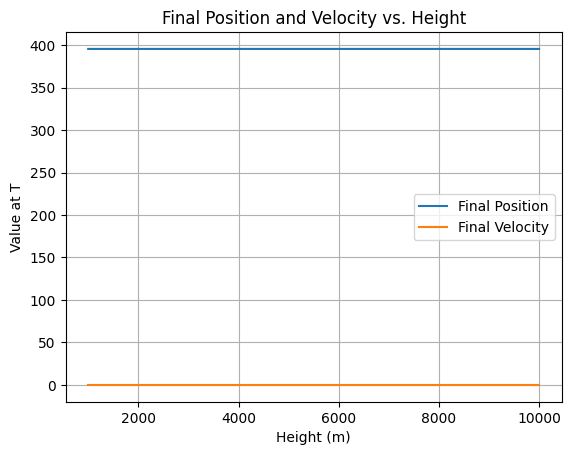

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 70
b = 1.77
Cd = 1.75
r = 1.225
A = 27
heights = np.linspace(1000, 10000, 10)

h = 0.1
# Initial conditions
y_initial = 0
v_initial = 10

def f(t, y, v):
    v_prime = -b / m * v
    y_prime = v
    return v_prime, y_prime

def runge_kutta(t, y, v, h):
    k1v, k1y = f(t, y, v)
    k2v, k2y = f(t + 0.5 * h, y + 0.5 * h * k1y, v + 0.5 * h * k1v)
    k3v, k3y = f(t + 0.5 * h, y + 0.5 * h * k2y, v + 0.5 * h * k2v)
    k4v, k4y = f(t + h, y + h * k3y, v + h * k3v)

    v_new = v + (k1v + 2 * k2v + 2 * k3v + k4v) / 6
    y_new = y + (k1y + 2 * k2y + 2 * k3y + k4y) / 6
    return y_new, v_new

def simulate(height):
    T = np.sqrt((2 * height * m) / (Cd * r * A))
    num_steps = int(T / h)
    t_values = np.zeros(num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    v_values = np.zeros(num_steps + 1)

    y = y_initial
    v = v_initial
    t = 0

    for i in range(num_steps + 1):
        t_values[i] = t
        y_values[i] = y
        v_values[i] = v

        y, v = runge_kutta(t, y, v, h)
        t += h

    return t_values, y_values, v_values
final_positions = []
final_velocities = []
for height in heights:
    t_values, y_values, v_values = simulate(height)
    final_positions.append(y_values[-1])
    final_velocities.append(v_values[-1])

#plotting the graphs
plt.figure()
plt.plot(heights, final_positions, label='Final Position')
plt.plot(heights, final_velocities, label='Final Velocity')
plt.xlabel('Height (m)')
plt.ylabel('Value at T')
plt.legend()
plt.title('Final Position and Velocity vs. Height')
plt.grid(True)
plt.show()